In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [18]:
# open de data
data = pd.read_csv('qualidade_pamonha.csv')

In [27]:
data.head()

,ano,temperatura,pH,milho,sacarose,boa
0,1987,53.3,7.83,0,14.82,1
1,1987,63.0,7.10,1,70.71,0
2,1987,58.0,7.12,1,65.81,0
3,1987,67.5,7.41,0,8.51,1
4,1987,61.1,7.77,1,60.14,0


In [26]:
# convert milho to categorical
# get unique values 
milho = data['milho'].unique()

# create a dictionary to map the values
milho_map = {}
for i, m in enumerate(milho):
    milho_map[m] = i

# map the values
data['milho'] = data['milho'].map(milho_map)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

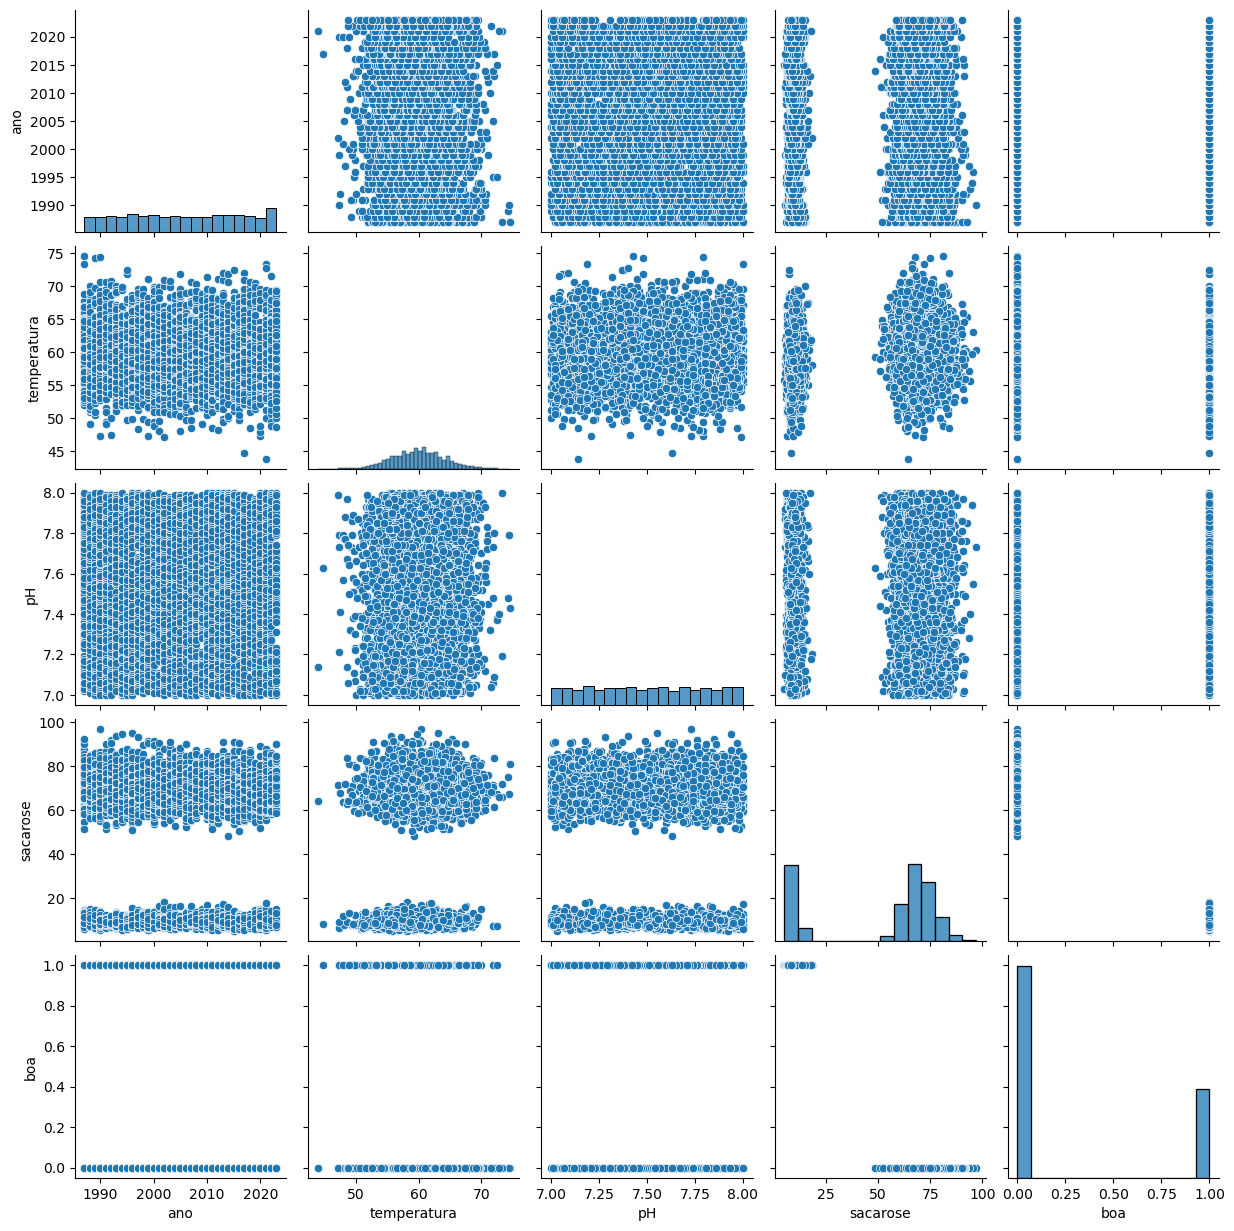

In [6]:
# plot pairplot
sns.pairplot(data)

<Axes: xlabel='sacarose', ylabel='boa'>

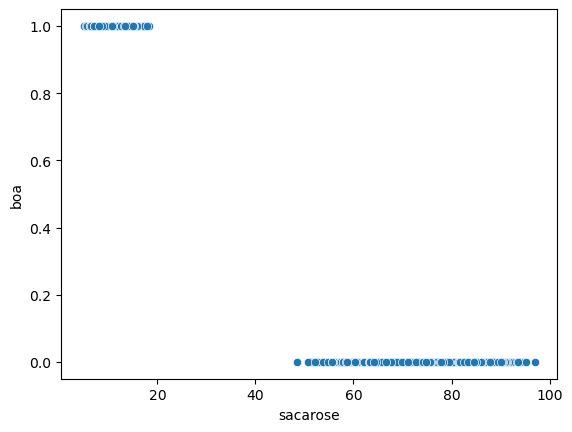

In [9]:
# plot sacarose
sns.scatterplot(x='sacarose', y='boa', data=data)

## OLS

In [35]:
# adjuste a linear model to predict boa with sacarose
X = data['sacarose']
Y = data['boa']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    boa   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 1.062e+05
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:29:21   Log-Likelihood:                 4581.2
No. Observations:                5000   AIC:                            -9158.
Df Residuals:                    4998   BIC:                            -9145.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1212      0.003    389.582      0.000       1.116       1.127
sacarose      -0.0158   4.85e-05   -325.903      0.000      -0.016      -0.016
==============================================================================
Omnibus:                       48.357   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.204
Skew:                           0.017   Prob(JB):                     6.32e-18
Kurtosis:                       3.616   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# adjust a linear model to predict boa with all data
X = np.asarray(data.drop('boa', axis=1))
Y = np.asarray(data['boa'])

X = sm.add_constant(X)
model = sm.GLM(Y, X).fit()

predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4994
Model Family:                Gaussian   Df Model:                            5
Link Function:               Identity   Scale:                       0.0078382
Method:                          IRLS   Log-Likelihood:                 5030.2
Date:                Mon, 29 Apr 2024   Deviance:                       39.144
Time:                        12:28:51   Pearson chi2:                     39.1
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0930      0.239      4.575      0.000       0.625       1.561
x1          1.929e-05      0.000      0.163      0.870      -0.000       0.000
x2            -0.0022      0.000     -7.062      0.000      -0.003      -0.002
x3             0.0142      0.004      3.275      0.001       0.006       0.023
x4            -0.1783      0.006    -31.181      0.000      -0.189      -0.167
x5            -0.0132   9.46e-05   -139.611      0.000      -0.013      -0.013
==============================================================================
"""

## GLM

In [45]:
from statsmodels.genmod.families import Poisson  # Example with Poisson distribution
from statsmodels.genmod.families import Binomial # Example with Binomial distribution


In [46]:
X = data.drop('boa', axis=1)
Y = data['boa']
X = sm.add_constant(X)

model = sm.GLM(Y, X, family=Binomial(link=sm.families.links.CLogLog())).fit()
predictions = model.predict(X)
model.summary()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
c:\ProgramData\anaconda3\Lib\site-pac

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    boa   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4994
Model Family:                Binomial   Df Model:                            5
Link Function:                CLogLog   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 29 Apr 2024   Deviance:                   4.3033e-09
Time:                        12:38:54   Pearson chi2:                 2.15e-09
No. Iterations:                    28   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -9.0305   3.24e+06  -2.79e-06      1.000   -6.35e+06    6.35e+06
ano             0.0169   1680.501   1.01e-05      1.000   -3293.704    3293.738
temperatura     0.0257   5554.221   4.63e-06      1.000   -1.09e+04    1.09e+04
pH             -1.2708   3.77e+04  -3.37e-05      1.000   -7.38e+04    7.38e+04
milho          -0.6861   6439.660     -0.000      1.000   -1.26e+04    1.26e+04
sacarose       -0.7684    441.572     -0.002      0.999    -866.233     864.697
===============================================================================
"""